# Import libraries and set up the environment

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## read the csv file

In [2]:
df = pd.read_csv(r"./data/California_Houses.csv")
df


,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.1583,735501.8070,67432.51700,21250.21377
1,358500,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733070,554279.8501,733236.8844,65049.90857,20880.60040
2,352100,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.7171,733525.6829,64867.28983,18811.48745
3,341300,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.2661,734095.2907,65287.13841,18031.04757
4,342200,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.2661,734095.2907,65287.13841,18031.04757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,78100,1.5603,25,1665,374,845,330,39.48,-121.09,162031.481100,654530.1863,830631.5430,248510.05820,222619.89040
20636,77100,2.5568,18,697,150,356,114,39.49,-121.21,160445.433500,659747.0684,836245.9152,246849.88890,218314.42460
20637,92300,1.7000,17,2254,485,1007,433,39.43,-121.22,153754.341200,654042.2140,830699.5732,240172.22050,212097.93620
20638,84700,1.8672,18,1860,409,741,349,39.43,-121.32,152005.022200,657698.0077,834672.4619,238193.86590,207923.19920


# right way cleaning

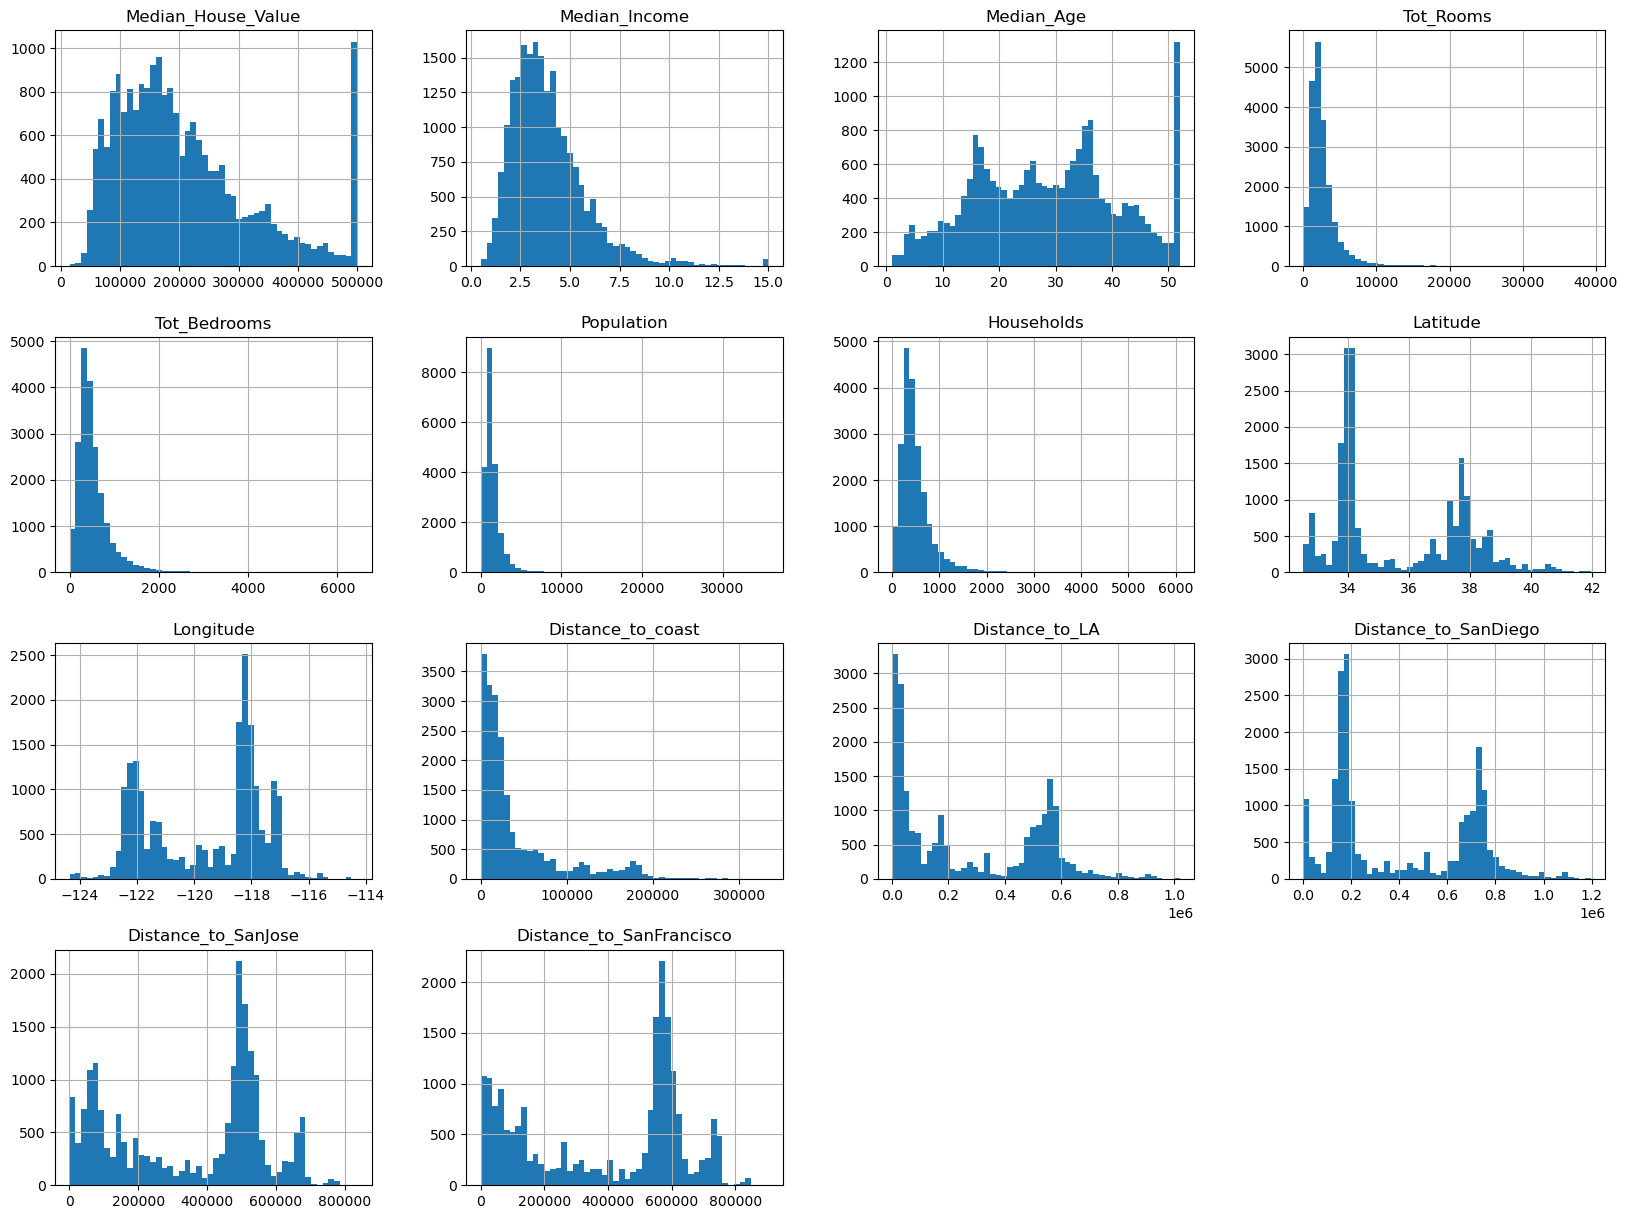

In [3]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

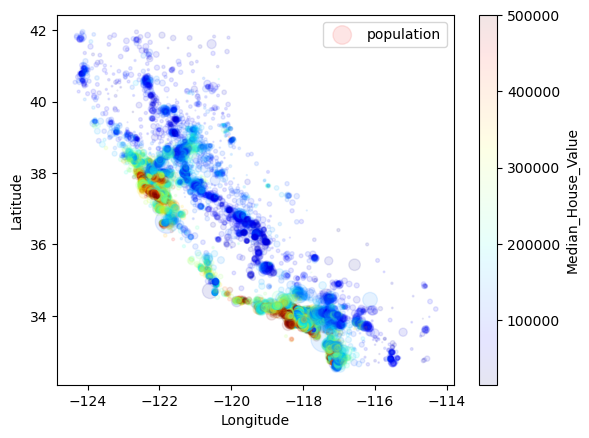

In [4]:
df.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.1,
        s=df['Population']/100, label="population", 
        c="Median_House_Value", cmap=plt.get_cmap("jet"))
plt.show()

In [5]:
corr_matrix =df.corr()
corr_matrix["Median_House_Value"].sort_values(ascending=False)

Median_House_Value          1.000000
Median_Income               0.688075
Tot_Rooms                   0.134153
Median_Age                  0.105623
Households                  0.065843
Tot_Bedrooms                0.050594
Population                 -0.024650
Distance_to_SanFrancisco   -0.030559
Distance_to_SanJose        -0.041590
Longitude                  -0.045967
Distance_to_SanDiego       -0.092510
Distance_to_LA             -0.130678
Latitude                   -0.144160
Distance_to_coast          -0.469350
Name: Median_House_Value, dtype: float64

In [18]:
# def mark_outliers(data:pd.DataFrame) -> pd.DataFrame:
#     df1 = data.copy()
    
#     for col in data.columns:    
#         Q1 = data[col].quantile(0.25)
#         Q3 = data[col].quantile(0.75)
#         IQR = Q3 - Q1
    
#         mx = Q3 + (1.5 * IQR)
#         mn = Q1 - (1.5 * IQR)
        
#         # counter +=  ((df1[col] < (Q1 - 1.5 * IQR)) | (df1[col] > (Q3 + 1.5 * IQR))).sum()
#         df1.loc[df1[col] > mx, col] = np.nan
#         df1.loc[df1[col] < mn, col] = np.nan
        
#     return df1

# no_outliers = mark_outliers(df)
# for i in range(50):
#     # before dropping
#     print("outliers count: {}".format(no_outliers.isnull().sum().sum()))
#     print("df length: {}".format(len(no_outliers)))
    
#     # after dropping outliers
#     no_outliers.dropna(inplace=True, how='any')
#     print("outliers count: {}".format(no_outliers.isnull().sum().sum()))
#     print("df length: {}".format(len(no_outliers)))
#     print("---------------------------")
#     no_outliers = mark_outliers(no_outliers)
    



<Axes: >

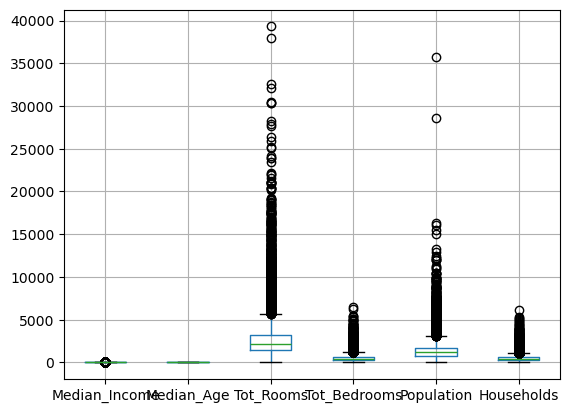

In [7]:
# removed_cols = ['Distance_to_LA', 'Distance_to_SanJose', 'Distance_to_SanDiego', 'Distance_to_coast', 'Distance_to_SanFrancisco', 'Longitude', 'Latitude', 'Median_House_Value']

# wanted_cols = [e for e in df.columns if e not in removed_cols]

# df.boxplot(column=wanted_cols)

In [24]:
# removed_cols = ['Distance_to_LA', 'Distance_to_SanJose', 'Distance_to_SanDiego', 'Distance_to_coast', 'Distance_to_SanFrancisco', 'Longitude', 'Latitude', 'Median_House_Value']

# wanted_cols = [e for e in df.columns if e not in removed_cols]
# no_outliers.boxplot(column=wanted_cols)
# plt.show()

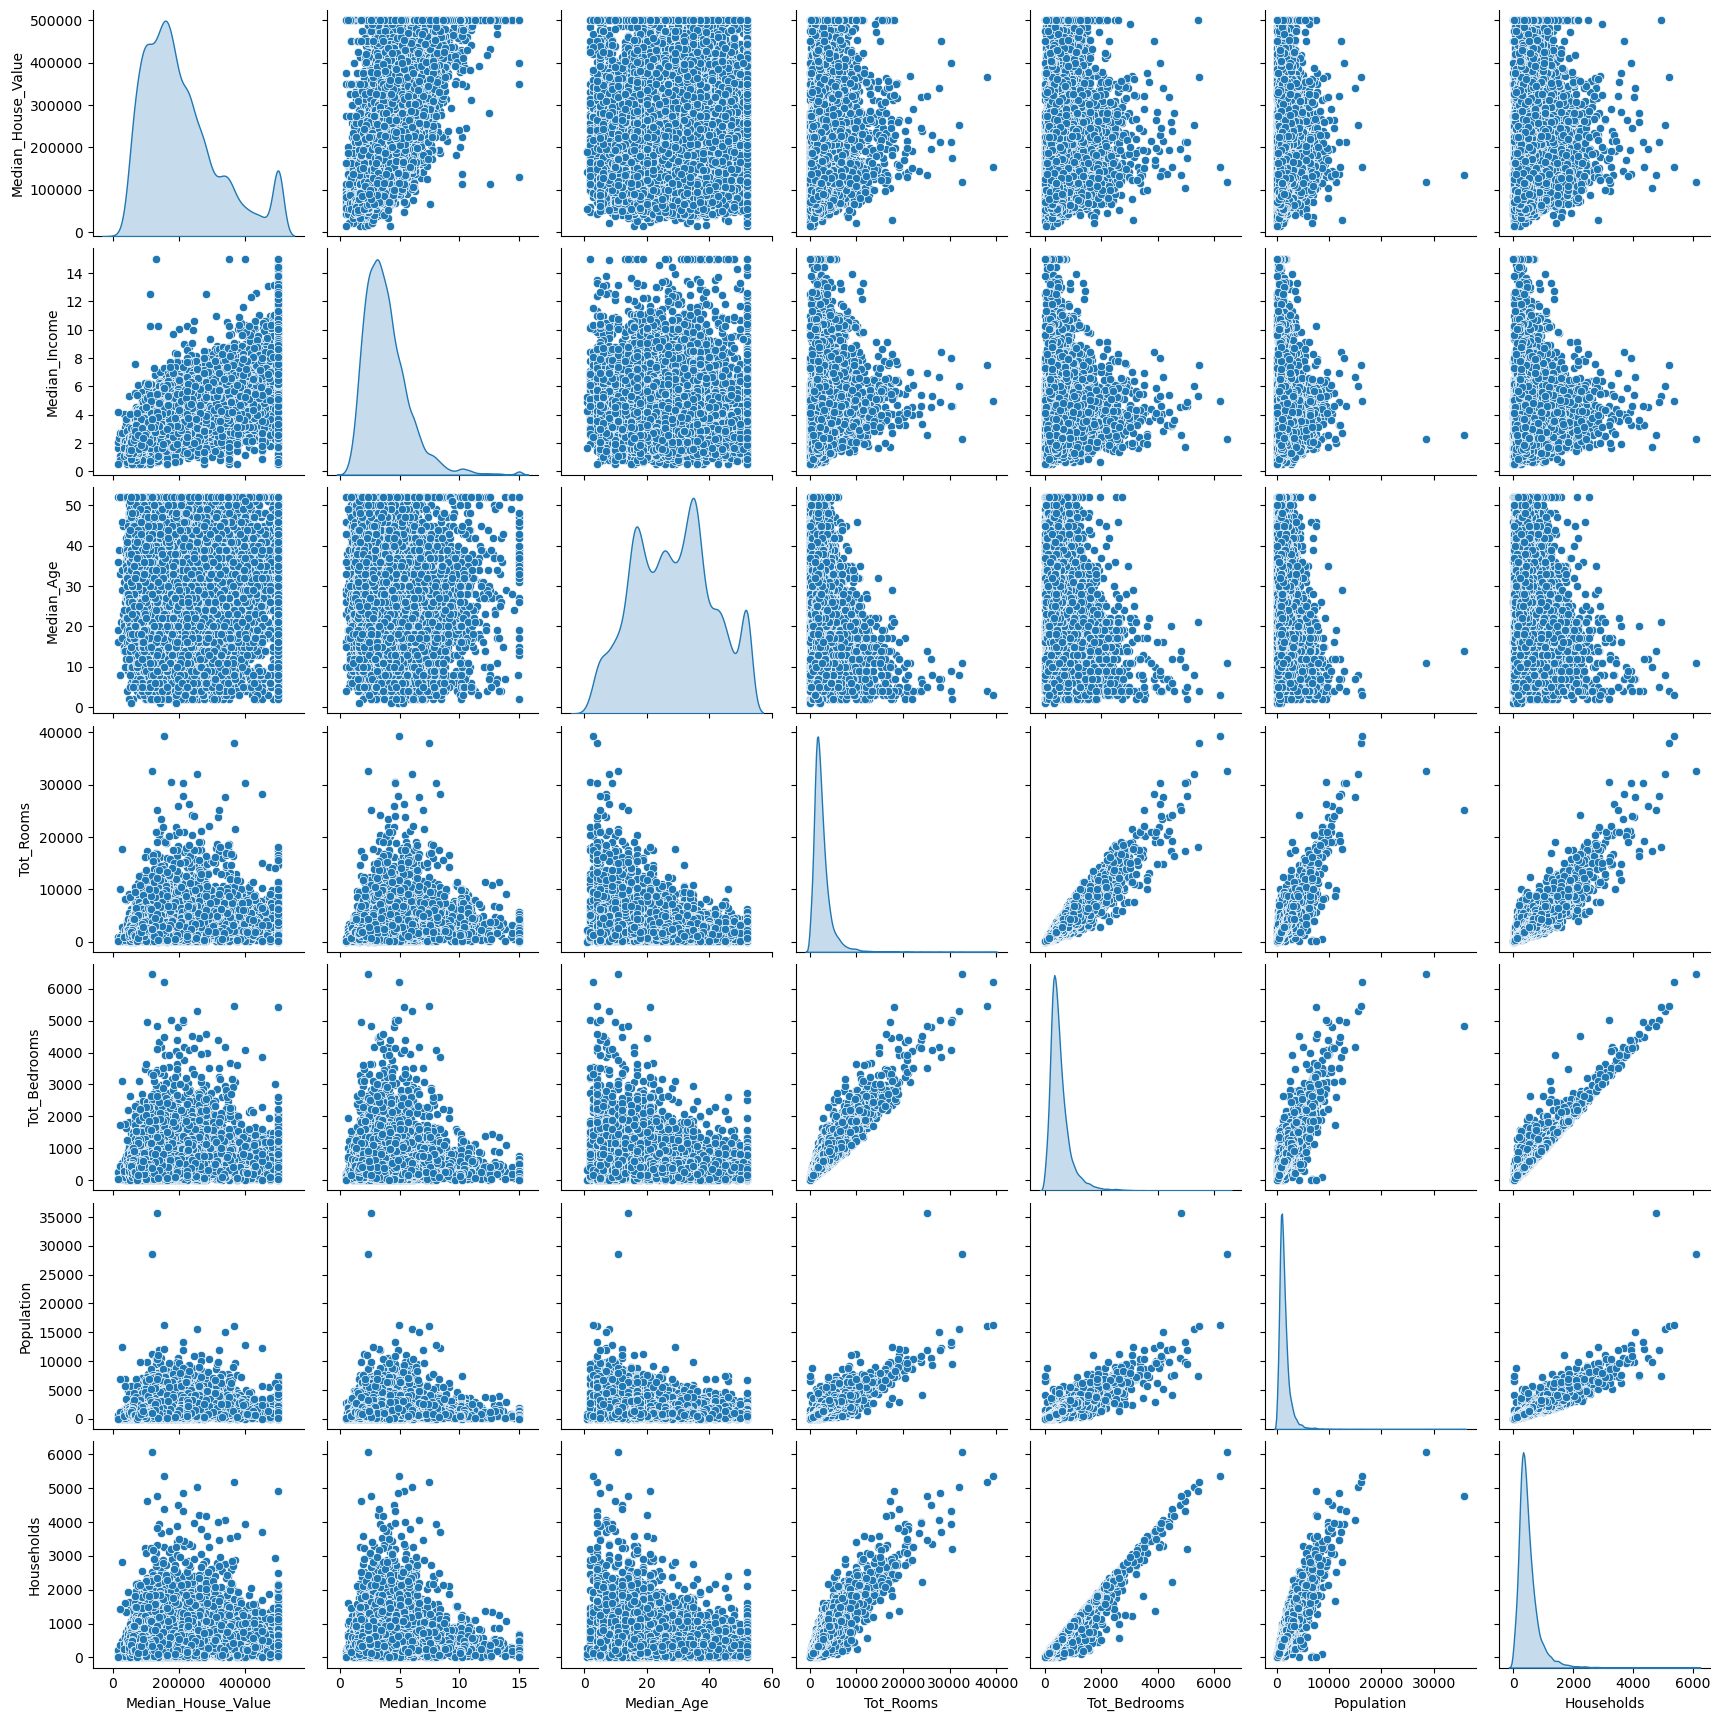

In [23]:
removed_cols = ['Distance_to_LA', 'Distance_to_SanJose', 'Distance_to_SanDiego', 'Distance_to_coast', 'Distance_to_SanFrancisco', 'Longitude', 'Latitude']
sns.pairplot(data=df.drop(removed_cols, axis = 1, inplace=False), diag_kind='kde')
plt.show()

### Data scaling

In [25]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_data = pd.DataFrame(scaled_data, columns=df.columns)
scaled_data.head()


,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,2.129631,2.344766,0.982143,-0.804819,-0.970706,-0.974429,-0.977033,1.052548,-1.327835,-0.635876,1.158969,1.165668,-1.297546,-1.461074
1,1.314156,2.332238,-0.607019,2.045890,1.348649,0.861439,1.669961,1.043185,-1.322844,-0.616285,1.149889,1.157842,-1.308518,-1.462552
2,1.258693,1.782699,1.856182,-0.535746,-0.825895,-0.820777,-0.843637,1.038503,-1.332827,-0.656307,1.151224,1.158840,-1.309359,-1.470824
3,1.165100,0.932968,1.856182,-0.624215,-0.719067,-0.766028,-0.733781,1.038503,-1.337818,-0.666299,1.153580,1.160808,-1.307426,-1.473945
4,1.172900,-0.012881,1.856182,-0.462404,-0.612239,-0.759847,-0.629157,1.038503,-1.337818,-0.666299,1.153580,1.160808,-1.307426,-1.473945


## Data splitting

In [26]:
x = scaled_data.drop(['Median_House_Value'], axis=1)
y = scaled_data['Median_House_Value']
x

,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,2.344766,0.982143,-0.804819,-0.970706,-0.974429,-0.977033,1.052548,-1.327835,-0.635876,1.158969,1.165668,-1.297546,-1.461074
1,2.332238,-0.607019,2.045890,1.348649,0.861439,1.669961,1.043185,-1.322844,-0.616285,1.149889,1.157842,-1.308518,-1.462552
2,1.782699,1.856182,-0.535746,-0.825895,-0.820777,-0.843637,1.038503,-1.332827,-0.656307,1.151224,1.158840,-1.309359,-1.470824
3,0.932968,1.856182,-0.624215,-0.719067,-0.766028,-0.733781,1.038503,-1.337818,-0.666299,1.153580,1.160808,-1.307426,-1.473945
4,-0.012881,1.856182,-0.462404,-0.612239,-0.759847,-0.629157,1.038503,-1.337818,-0.666299,1.153580,1.160808,-1.307426,-1.473945
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.444985,-0.389087,-0.512592,-0.443449,1.801647,-0.758826,2.473038,1.554570,1.494389,-0.463643,-0.655969
20636,-0.691593,-0.845393,-0.888704,-0.920853,-0.944405,-1.008420,1.806329,-0.818722,2.440761,1.575629,1.513790,-0.471288,-0.673183
20637,-1.142593,-0.924851,-0.174995,-0.125578,-0.369537,-0.174042,1.778237,-0.823713,2.304594,1.552601,1.494624,-0.502040,-0.698038
20638,-1.054583,-0.845393,-0.355600,-0.305998,-0.604429,-0.393753,1.778237,-0.873626,2.268994,1.567358,1.508353,-0.511151,-0.714729


In [27]:
#split the data 70:30
x_train, x_validationAndTest, y_train, y_validationAndTest = train_test_split(x, y, train_size=0.7)

#split the 30 50:50
x_validation, x_test, y_validation, y_test = train_test_split(x_validationAndTest, y_validationAndTest, train_size=0.5)



-------------------
## Model interpretation
* model score: the higher, the better
* MSE: the closer to zero the more accurate the prediction is
* MAE: same as MSE, closer to zero means more accurate model

----------------
## helpful resources
- [here](https://towardsdatascience.com/what-are-rmse-and-mae-e405ce230383)
- [here](https://towardsdatascience.com/how-to-improve-the-accuracy-of-a-regression-model-3517accf8604)
- [linear regression docs](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score)

----------------

## linear regression

In [32]:
LR = LinearRegression()
model = LR.fit(x_train, y_train)


linear_prediction = model.predict(x_validation)

print(f"score: {LR.score(x_validation, y_validation)}")
print(f"MSE: {metrics.mean_squared_error(linear_prediction, y_validation)}")
print(f"MAE: {metrics.mean_absolute_error(y_validation, linear_prediction)}")

score: 0.6277171574696824
MSE: 0.36342201293471427
MAE: 0.4338928874422087


## lasso regression

In [29]:
lasso = Lasso(max_iter=500)
lasso.fit(x_train, y_train)

lasso_prediction = lasso.predict(x_validation)
print(f"score: {lasso.score(x_validation, y_validation)}")
print(f"MSE: {metrics.mean_squared_error(y_validation, lasso_prediction)}")
print(f"MAE: {metrics.mean_absolute_error(y_validation, lasso_prediction)}")

score: -5.4462975427771454e-05
MSE: 0.9762518291432595
MAE: 0.7788683395180848


## Ridge regression

In [33]:
ridge = Ridge()
ridge.fit(x_train, y_train)

ridge_prediction = ridge.predict(x_validation)
print(f"score: {ridge.score(x_validation, y_validation)}")
print(f"MSE: {metrics.mean_squared_error(y_validation, ridge_prediction)}")
print(f"MAE: {metrics.mean_absolute_error(y_validation, ridge_prediction)}")

score: 0.6276861560470957
MSE: 0.36345227648197775
MAE: 0.43393230290337814


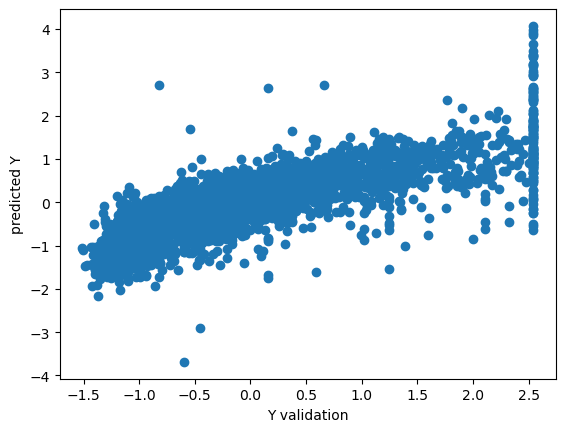

In [31]:
plt.scatter(y_validation, ridge_prediction)
plt.xlabel('Y validation')
plt.ylabel('predicted Y')
plt.show()

## Report